<a href="https://colab.research.google.com/github/penguinlin777/data_processing/blob/main/220705_0311_2-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# DanDan Requirements

2nd col -> 2nd maximum -> z

fig 1: x -> 4th col * 10 y -> 2nd

fig 2: x -> 1 / 开尔文(T) y -> 1 / z

fig 3: 拟合，GRG


In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter

# Read File
First, connect to google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
FILE_PATH = "/content/drive/MyDrive/data/20220705-0311-2-3"  # change data floder path here

df_list = []
temp_list = []
END_ROWS = 3400 - 16
def temp_convertor(center_degree):
  return center_degree + 273

for file_name in os.listdir(FILE_PATH):
  df = pd.read_csv(FILE_PATH + "/" + file_name, sep='\s+|\t| ', 
        header=None, error_bad_lines=False, skiprows=16)
  df = df.iloc[:END_ROWS, 0:4]
  shape_x, shape_y = df.shape
  if shape_y != 4 or shape_y > 5000:
    print("file name:" + file_name)
    raise Exception("Wrong file format")
  df_list.append(df)
  # 从文件名中提取温度值，根据文件名选用下面的语句
  # converted_name = file_name[1:file_name.find('_')] # Option 1
  converted_name = file_name[0:file_name.find('.')] # Option 2
  temp_list.append(temp_convertor(int(converted_name)))

for df, file_name in zip(df_list, os.listdir(FILE_PATH)):
  print(file_name)
  print(df.head(3))

print(temp_list)

25.plt
       0    1    2         3
0  0.002  0.0  0.0  0.000142
1  0.003  0.0  0.0  0.000213
2  0.004  0.0  0.0  0.000284
100.plt
       0          1          2         3
0  0.002   0.883012   0.000000  0.000142
1  0.003   6.907731   0.000000  0.000213
2  0.004  15.252526  59.559294  0.000284
110.plt
       0          1          2         3
0  0.002   0.000000   0.000000  0.000142
1  0.003  21.024731   0.000000  0.000213
2  0.004  25.954109  77.692969  0.000284
120.plt
       0    1    2         3
0  0.002  0.0  0.0  0.000142
1  0.003  0.0  0.0  0.000213
2  0.004  0.0  0.0  0.000284
130.plt
       0          1          2         3
0  0.002  21.039457   0.000000  0.000142
1  0.003  31.451303   0.000000  0.000213
2  0.004  38.839108  95.041498  0.000284
140.plt
       0    1    2         3
0  0.002  0.0  0.0  0.000142
1  0.003  0.0  0.0  0.000213
2  0.004  0.0  0.0  0.000284
150.plt
       0          1          2         3
0  0.002  21.039457   0.000000  0.000142
1  0.003  28.646818   0

# Fig 1

x: 4th col * 10 

y: 2nd

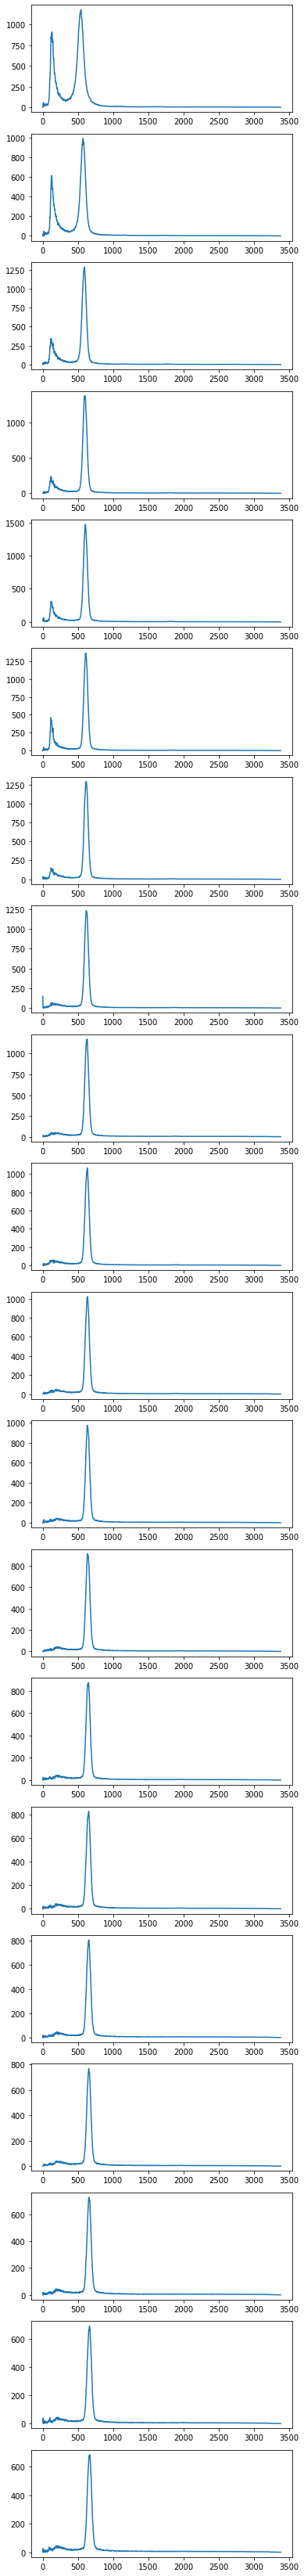

In [ ]:
# sns.set()
sns.reset_orig()

# set figure size
plt.figure(figsize=(6, 3 * len(df_list)))

for i, df in enumerate(df_list):
  plt.subplot(len(df_list), 1, i + 1)
  # plt.plot(df.iloc[:, 3] * 10, df.iloc[:, 1])   # Option 1: real x axis
  plt.plot(range(len(df.iloc[:, 1])), df.iloc[:, 1])  # Option 2: index

# Fig 2
Find second peaks with scipy

In [ ]:
# Option1: scipy find_peaks

# second_peaks = []
# peaks_value = []

# for i, df in enumerate(df_list):
#   data = df.iloc[:, 1]
#   res, _ = find_peaks(data, height=500, distance=100)

#   if len(res) != 2:
#     raise Exception("Find peaks error, you need to adjust parameters in find_peaks")
#   second_peaks.append([res[1], data[res[1]]])
#   peaks_value.append(data[res[1]])

# print(second_peaks)

In [ ]:
# Option 2: region maximum

REGION_START = 500
REGION_END = 1000

peaks_value = []

for df in df_list:
  data = df.iloc[:, 1]
  peaks_value.append(max(data[REGION_START:REGION_END]))

print(peaks_value)

[1179.891479, 994.583618, 1283.520142, 1375.212036, 1470.144287, 1359.745361, 1285.518188, 1234.16626, 1173.577881, 1067.493774, 1021.873047, 975.443542, 911.073792, 874.936401, 825.855286, 806.947815, 765.372009, 726.785889, 688.826416, 682.456238]


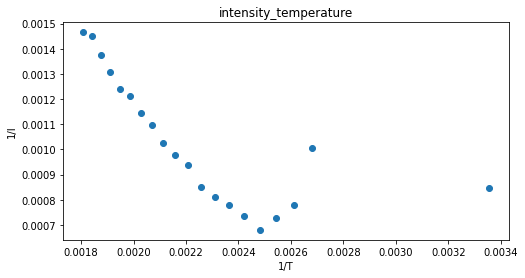

In [ ]:
x = [1 / temp for temp in temp_list]
y = [1 / peak for peak in peaks_value]
# 画布大小 figsize, 清晰度 dpi
plt.figure(figsize=(8, 4))
# 图片标题 
plt.title('intensity_temperature')
# 轴标题
plt.xlabel('1/T')
plt.ylabel('1/I')
# 画布粗细和刻度

plt.scatter(x, y, linewidth = 1.0, linestyle = '-')
plt.show()

[(0.0018083182640144665, 0.001465295420158501), (0.001841620626151013, 0.00145174455678831), (0.001876172607879925, 0.0013759210451594224), (0.0019120458891013384, 0.0013065541831175065), (0.001949317738791423, 0.001239237508809662), (0.0019880715705765406, 0.0012108658949723063), (0.002028397565922921, 0.0011429402169769822), (0.002070393374741201, 0.0010976059335487942), (0.0021141649048625794, 0.001025174658442713), (0.0021598272138228943, 0.0009785951424551077), (0.002207505518763797, 0.000936773613444981), (0.002257336343115124, 0.00085209513249168), (0.0023094688221709007, 0.0008102636025716665), (0.002364066193853428, 0.000777896422885928), (0.002421307506053269, 0.0007354318158986534), (0.0024813895781637717, 0.0006802053436813444), (0.002544529262086514, 0.0007271605932919569), (0.0026109660574412533, 0.0007791073683049377), (0.002680965147453083, 0.0010054458789607774), (0.003355704697986577, 0.0008475355723795341)]


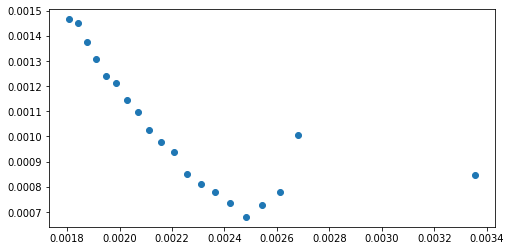

In [ ]:
# sort
def sort_data(x, y):
  xy = [(xi, yi) for xi, yi in zip(x, y)]
  sorted_xy = sorted(xy, key=lambda item: item[0])
  print(sorted_xy)

  return [xi for xi, _ in sorted_xy], [yi for _, yi in sorted_xy]

x, y = sort_data(x, y)

plt.figure(figsize=(8, 4))
plt.scatter(x, y)
plt.show()

# Fig 3

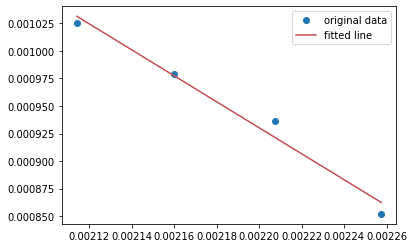

In [ ]:
# linear regression

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import optimize
from scipy.optimize import leastsq

x_fit = x[8:12]
y_fit = y[8:12]
# z1 = np.polyfit(x_fit, y_fit, 1)
# p1 = np. poly1d(z1)
# y_fitted = p1(x_fit)
# plt.scatter(x_fit, y_fit)
# plt.plot(x_fit, y_fitted)
# plt.show
res = st.linregress(x_fit, y_fit)
plt.plot(x_fit, y_fit, 'o', label='original data')
plt.plot(x_fit, res.intercept + res.slope*np.array(x_fit), 'r', label='fitted line')
plt.legend()
plt.show()

# Fig 4

Fitting

Equations: @dandan

Objective:

The minimum of [the sum of least squares] for I_q_fit and I_q
note:

1. in dandan's case the subscript PMMA is PAGE
2. q is the forth column * 10
3. need rewrite: df.iloc[:, 3] * 10 is q; df.iloc[:, 1] is I_q
altering parameters (the last equation):
  - b_PS
  - b_PAGE
  - A_0
  - chi

Inputs: 
- M_w
- M_n
- M_n_PS
- a_1
- b_5
- m_S
- m_A
- rho_PS
- rho_PAGE
- v_nor = 118

Equation:
- w_PS = (m_S * b_5 / 5) / (m_A * a_1 + m_S * b_5 / 5)
- f_PS = w_PS / rho_PS / (w_PS / rho_PS + (1 - w_PS) / rho_PAGE)
- D_PS = D_PAGE = 1+(M_w / M_n - 1) / (w_PS ** 2 + (1 - w_PS))
- v_PS = m_S / rho_PS /  0.602
- v_PAGE = m_A / rho_PAGE / 0.602
- N_PS = v_PS * M_n_PS / v_nor / m_S
- N_PAGE = v_PAGE * (M_n - M_n_PS) / v_nor / m_A
- y_PS = N_PS * b_PS ** 2 * q ** 2 / 6
- y_PAGE = N_PAGE * b_PAGE ** 2 * q ** 2 / 6
- g1_PS = (1 - (y_PS * (D_PS - 1) + 1) ** ((D_PS - 1) ** -1)) / y_PS
- g1_PAGE = (1 - (y_PAGE * (D_PAGE - 1) + 1) ** ((D_PAGE - 1) ** -1)) / y_PAGE
- g2_PS = 2 * (-1 + y_PS + (y_PS * (D_PS - 1) + 1) ** ((D_PS - 1) ** -1)) / y_PS ** 2
- g2_PAGE = 2 * (-1 + y_PAGE + (y_PAGE * (D_PAGE - 1) + 1) ** ((D_PAGE -1) ** -1)) / y_PAGE ** 2
- rc = (v_PS * N_PS + v_PAGE * N_PAGE) / (v_PS * v_PAGE) ** 1/2
- s_PS_PS = rc * f_PS ** 2 * g2_PS
- s_PAGE_PAGE = rc * (1 - f_PS) ** 2 * g2_PS
- s_PS_PAGE = rc * f_PS * (1 - f_PS) * g1_PS * g1_PAGE
- S_q = s_PS_PS + 2 * s_PS_PAGE + s_PAGE_PAGE
- W_q = s_PS_PS * s_PAGE_PAGE - s_PS_PAGE ** 2
- I_q_fit = A_0 / (S_q / W_q - 2 * chi)

# Fig 5

Gaussian fitting of second peak in Fig 1

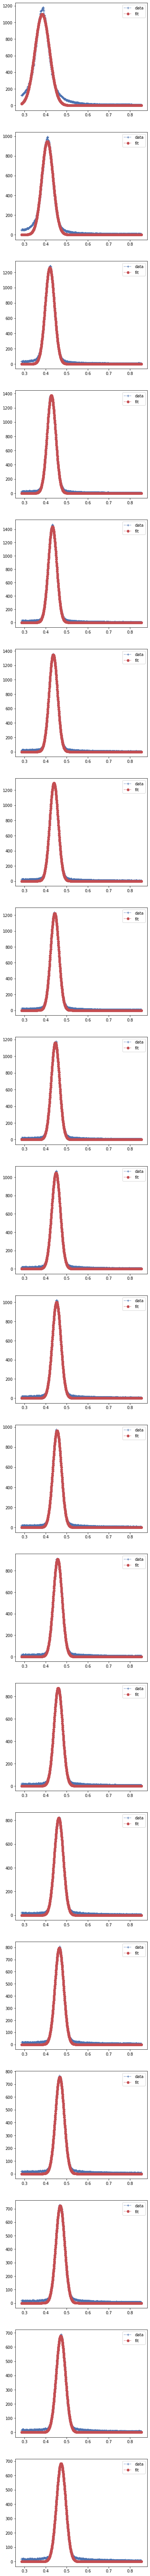

In [ ]:
from scipy.optimize import curve_fit
import warnings
import numpy as np

warnings.filterwarnings('ignore')

START_REGION = 400
END_REGION  = 1200

def gaus(x, a, x0, sigma):
  return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

plt.figure(figsize=(6, 6 * len(df_list)))

fit_opt = []  # fitting parameters

for i, df in enumerate(df_list):
  plt.subplot(len(df_list), 1, i + 1)
  x = df.iloc[START_REGION: END_REGION, 3] * 10
  y = df.iloc[START_REGION: END_REGION, 1]

  n = len(x)                    
  mean = sum(x * y) / sum(y)
  sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))

  popt, pcov = curve_fit(gaus, x, y, p0=[1, mean, sigma])
  fit_opt.append(popt)
  # popt是优化之后的三个参数，直接带入gauss使用
  plt.plot(x, y, 'b+:', label='data')
  plt.plot(x, gaus(x, *popt), 'ro:', label='fit')
  plt.legend()

FWHM:0.082
FWHM:0.064
FWHM:0.052
FWHM:0.048
FWHM:0.047
FWHM:0.048
FWHM:0.048
FWHM:0.047
FWHM:0.047
FWHM:0.049
FWHM:0.048
FWHM:0.048
FWHM:0.049
FWHM:0.049
FWHM:0.050
FWHM:0.049
FWHM:0.049
FWHM:0.050
FWHM:0.052
FWHM:0.052


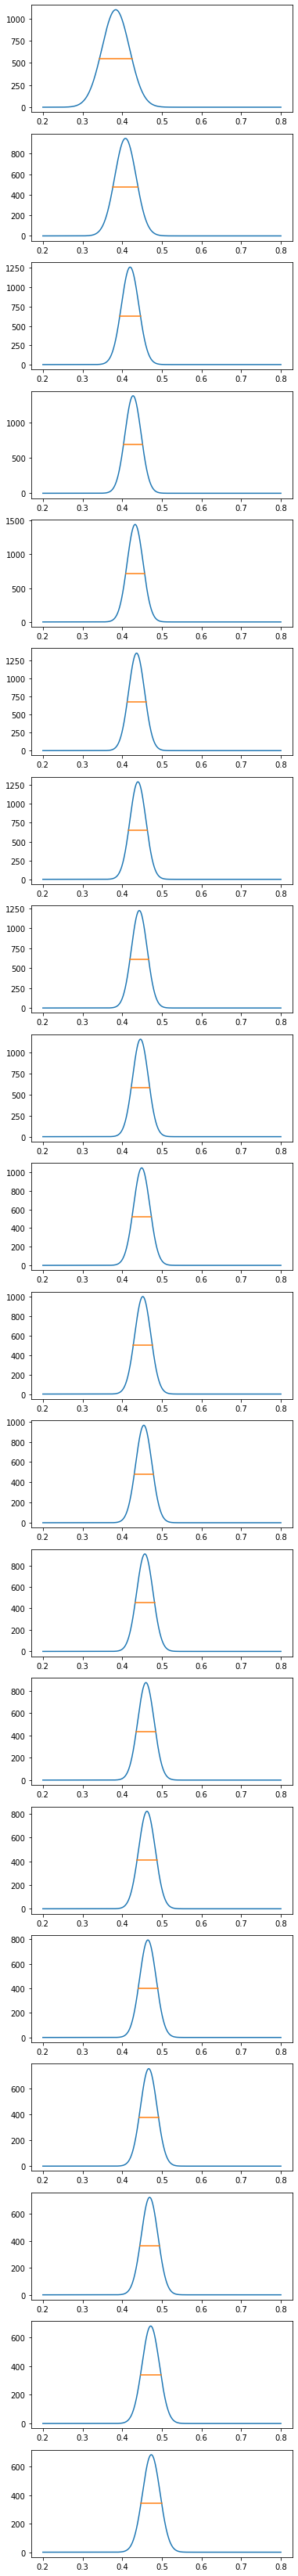

In [ ]:
# 峰值的半峰宽度
def peak(x, c):
  return np.exp(-np.power(x - c, 2) / 16.0)

def lin_interp(x, y, i, half):
  return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

def half_max_x(x, y):
  half = (max(y) - min(y)) / 2.0
  signs = np.sign(np.add(y, -half))
  zero_crossings = (signs[0:-2] != signs[1:-1])
  zero_crossings_i = np.where(zero_crossings)[0]
  return [lin_interp(x, y, zero_crossings_i[0], half), lin_interp(x, y, zero_crossings_i[1], half)]

START_GEN = 0.2   # region start and end
END_GEN = 0.8
hw_result = []    # store result

plt.figure(figsize=(6, 3 * len(df_list)))

for i, opt in enumerate(fit_opt):
  x = np.linspace(START_GEN, END_GEN, 1000)
  y = gaus(x, *opt)

  # find the two crossing points
  hmx = half_max_x(x, y)

  # print the answer
  fwhm = hmx[1] - hmx[0]
  hw_result.append(fwhm)
  print("FWHM:{:.3f}".format(fwhm))

  # a convincing plot
  half = max(y) / 2.0

  # plot
  plt.subplot(len(df_list), 1, i + 1)
  plt.plot(x, y)
  plt.plot(hmx, [half, half])

# Fig 6

[(25, 12.243406509261334), (100, 15.742689024244443), (110, 19.262440276288025), (120, 20.77515632784514), (130, 21.07808049093683), (140, 21.048221680787762), (150, 21.01602967468096), (160, 21.289039258544634), (170, 21.319256617213767), (180, 20.600123620610283), (190, 20.834998367285067), (200, 20.796086860839875), (210, 20.479786808809582), (220, 20.494680664148607), (230, 20.0797912969048), (240, 20.341343148952056), (250, 20.32549304873423), (260, 20.092371293828432), (270, 19.367891940593264), (280, 19.133404959131845)]


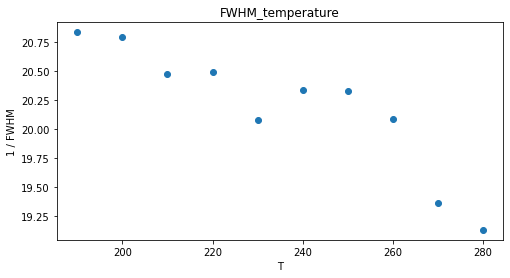

             0
20.479787  210
20.494681  220
20.079791  230
20.341343  240
20.325493  250
20.092371  260
19.367892  270
19.133405  280


In [ ]:
from tabulate import tabulate

x = [temp - 273 for temp in temp_list]
y = [1 / hw for hw in hw_result]

x, y = sort_data(x, y)

# 画布大小 figsize, 清晰度 dpi
plt.figure(figsize=(8, 4))
# 图片标题 
plt.title('FWHM_temperature')
# 轴标题
plt.xlabel('T')
plt.ylabel('1 / FWHM')
# 画布粗细和刻度
plt.scatter(x[10:], y[10:], linewidth = 1.0, linestyle = '-')
plt.show()
df = pd.DataFrame(x[12:],y[12:])
print(df)

# Fig 7

x = 253.55229229369277, y = 20.319862629848426


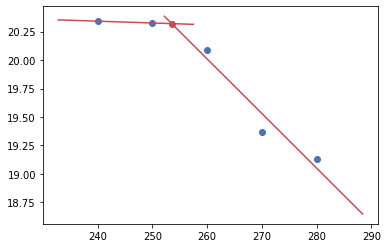

In [312]:
import numpy as np
import sympy

x_fit1 = x[15:17]
y_fit1 = y[15:17]

res1 = st.linregress(x_fit1, y_fit1)
plt.scatter(x_fit1, y_fit1, color='b', label='original data')
x_fitted1 = np.linspace(0.97 * x_fit1[0], 1.03 * x_fit1[len(x_fit1) - 1], 20)   # x coordination
plt.plot(x_fitted1, res1.intercept + res1.slope*np.array(x_fitted1), 'r', label='fitted line')

x_fit2 = x[17:]
y_fit2 = y[17:]
res2 = st.linregress(x_fit2, y_fit2)
plt.scatter(x_fit2, y_fit2, color='b', label='original data')
x_fitted2 = np.linspace(0.97 * x_fit2[0], 1.03 * x_fit2[len(x_fit2) - 1], 20)   # x coordination
plt.plot(x_fitted2, res2.intercept + res2.slope*np.array(x_fitted2), 'r', label='fitted line')

# cal intersection
inter_x = (res1.intercept - res2.intercept) / (res2.slope - res1.slope)
inter_y = res2.intercept + res2.slope * inter_x
plt.scatter(inter_x, inter_y, color='r')

print(f'x = {inter_x}, y = {inter_y}')